In [120]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

This is a feed forward network with 10 input values(nodes) hidden layer with 10 nodes and a output layer 
with 10 output values(nodes)
##  Initializations
Initializing number of samples to 300,
number of input nodes to 10,
number of nodes in hidden layer to 10,
number of output nodes to 10,
learning rate to 0.01,
momentum to 0.9

Note:Learning rate aids in slowing down the gradient descent Momentum provides accelaration to gradient descent 
    based on previous value of gradient

In [121]:
n_samples=300
n_hidden=10
n_in=10
n_out=10

learning_rate=0.01
momentum=0.9
np.random.seed(0)

## Activation Functions:
The activation function for the hidden layer is tanhx function and the activation function for output layer is sigmoid function

## Train Function:
This takes a input and corresponding output and the current weights and biases as parameters.
The function does forward propagation and finds the error values based on the expected output.
Now the gradient values for each weight are calculated by back propagation.
The error values at each node are taken as gradient values for biases.

## Predict Function
This function takes input and predicts the output based on the current weights and biases

In [122]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh_derivative(x):
    return 1-np.tanh(x)**2

def tanh_prime(x):
    return  1 - np.tanh(x)**2


def train(_input_,_output_,weights1,weights2,bias1,bias2):
    signal1=np.dot(_input_,weights1)+bias1
    activated_signal1=np.tanh(signal1)   
    
    signal2=np.dot(activated_signal1,weights2)+bias2
    activated_signal2=sigmoid(signal2)
    
    E2=activated_signal2-_output_
    delta2=E2
    delta1=tanh_derivative(signal1)*np.dot(weights2,delta2)
    
    grad2=np.outer(activated_signal1,delta2)
    grad1=np.outer(_input_,delta1)
    
    loss = -np.mean ( _output_ * np.log(activated_signal2) + (1 - _output_) * np.log(1 - activated_signal2) )
    return loss,(grad1,grad2,delta1,delta2)

    
def predict(_input_,weights1,weights2,bias1,bias2):
    signal1=np.dot(_input_,weights1)+bias1
    activated_signal1=np.tanh(signal1)
    signal2=np.dot(activated_signal1,weights2)+bias2
    activated_signal2=sigmoid(signal2)
    return (activated_signal2 > 0.5).astype(int)

## Initializations
The weights for the hidden layer and the output layer are initialized based on random distributions
The bias for every layer are initialized to zero
The input is initialized using binomial distribution with equal probability to both 0 and 1

In [123]:
weights1=np.random.normal(scale=0.1,size=(n_in,n_hidden))
weights2=np.random.normal(scale=0.1,size=(n_hidden,n_out))

bias1=np.zeros(n_hidden)
bias2=np.zeros(n_out)

_input_=np.random.binomial(1,0.5,(n_samples,n_in))
_output_=_input_^1

params=[weights1,weights2,Bias1,Bias2]

In [124]:
mean_errors=[]
for epoch in range(100):
    error=[]
    upd=[0]*len(params)
    t0=time.clock()
    
    for i in range(n_samples):
        loss,grad=train(_input_[i],_output_[i],*params)
        
        for j in range(len(params)):
            params[j]-= upd[j]
            
        for j in range(len(params)):         
            upd[j]=learning_rate*grad[j]+momentum*upd[j]
            
        error.append(loss)
       
    print("epoch:",epoch," Loss:",np.mean(error)," Time:", time.clock()-t0)
    mean_errors.append(np.mean(error))
x = np.random.binomial(1, 0.5, n_in)
print("XOR prediction:")
print(x)
print(predict(x, *params))   
    

epoch: 0  Loss: 0.52418778762  Time: 0.039718999999990956
epoch: 1  Loss: 0.198900617106  Time: 0.0246580000000165
epoch: 2  Loss: 0.100613921092  Time: 0.027721999999982927
epoch: 3  Loss: 0.0561544518702  Time: 0.02719600000000355
epoch: 4  Loss: 0.0338647593145  Time: 0.026674000000014075
epoch: 5  Loss: 0.0251564489922  Time: 0.032097999999990634
epoch: 6  Loss: 0.020116337855  Time: 0.03502800000001116
epoch: 7  Loss: 0.0167519273875  Time: 0.029026999999985037
epoch: 8  Loss: 0.0143531978165  Time: 0.03568200000000843
epoch: 9  Loss: 0.0125493851688  Time: 0.03423100000000545
epoch: 10  Loss: 0.0111406036115  Time: 0.02497700000000691
epoch: 11  Loss: 0.010009412334  Time: 0.03440299999999752
epoch: 12  Loss: 0.0090808849373  Time: 0.02537199999997597
epoch: 13  Loss: 0.00830509624746  Time: 0.03513000000000943
epoch: 14  Loss: 0.00764742873205  Time: 0.02464899999998238
epoch: 15  Loss: 0.00708305780677  Time: 0.025469000000015285
epoch: 16  Loss: 0.00659368358944  Time: 0.03470

## Plot of Error values
The below graph shows how the error value was being reduced over time

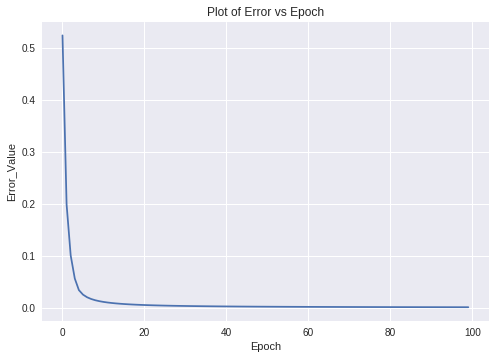

In [125]:
sns.set_style("darkgrid")
plt.plot(range(100),mean_errors)
plt.xlabel("Epoch")
plt.ylabel("Error_Value")
plt.title("Plot of Error vs Epoch")
plt.show()